## Supervised Learning

#### Overview 

><img src="Images/Table1.png"  />

><img src="Images/Supervised_Learning1.png"  />

><img src="Images/LinearRegression1.png"  />

><img src="Images/Regression_Plot.png"  />

><img src="Images/Classification_Model1.png"  />

#### Termanology

><img src="Images/DataSet1.png"  />

><img src="Images/DataSet2.png"  />

><img src="Images/DataSet3.png"  />

####  Regression Model Process

><img src="Images/Regression_Process.png"  />

#### Step 1 -> Get Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading file into a dataframe
# I am using a mac 
# the directories use '/' on the mac and you may need to use '\\' or '\' on windows
df = pd.read_csv('./Data/Used_Cars.csv')   # ./ current directory
df.head(6)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561,white,2c4rdgeg9jr237989,167655771,texas,2 days left


In [4]:
df.columns # get the columns of the dataframe


Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'condition'],
      dtype='object')

In [5]:
df.info()  # get some information about the data in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         2499 non-null   int64 
 1   brand         2499 non-null   object
 2   model         2499 non-null   object
 3   year          2499 non-null   int64 
 4   title_status  2499 non-null   object
 5   mileage       2499 non-null   int64 
 6   color         2499 non-null   object
 7   vin           2499 non-null   object
 8   lot           2499 non-null   int64 
 9   state         2499 non-null   object
 10  condition     2499 non-null   object
dtypes: int64(4), object(7)
memory usage: 214.9+ KB


##### Steps 2 and 3-> Clean  and Visualize Data

In [6]:
print(df.corr()) # get the correlation between columns

            price      year   mileage       lot
price    1.000000  0.418274 -0.400838  0.159369
year     0.418274  1.000000 -0.594686  0.164582
mileage -0.400838 -0.594686  1.000000 -0.130475
lot      0.159369  0.164582 -0.130475  1.000000


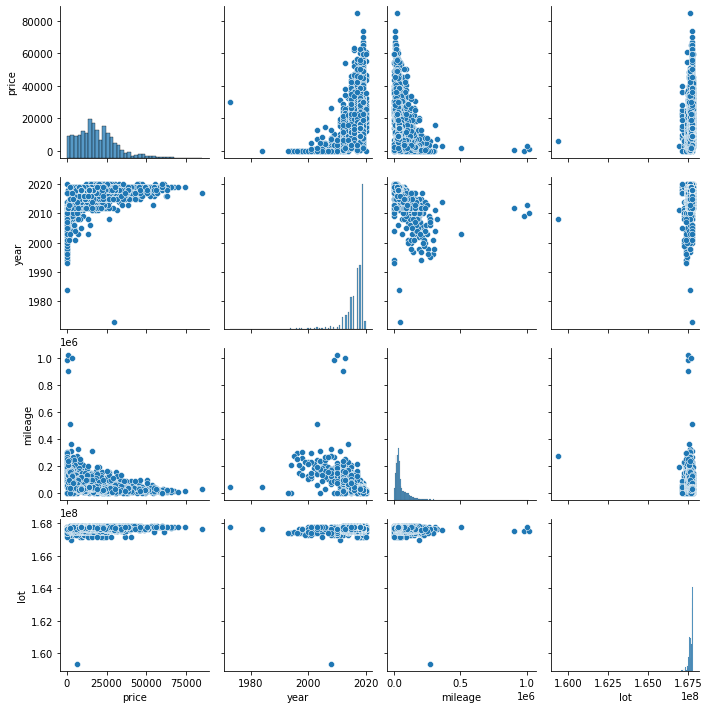

In [7]:
# Creating a pairwise plot in Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# sns.pairplot(df,  height=3.5, corner=True)
sns.pairplot(df)

plt.show()

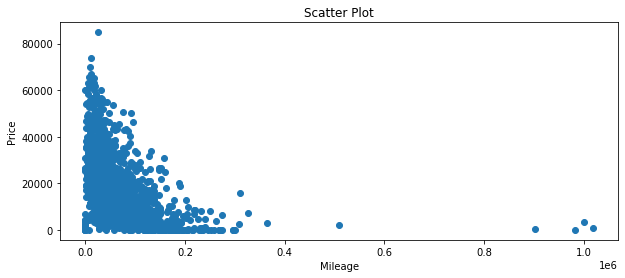

In [8]:

fig, ax = plt.subplots(figsize = (10,4))

ax.scatter( df['mileage'], df['price'])

ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
ax.set_title('Scatter Plot')


plt.show()

Looks like we have some outliers what should we do? We could remove them or we could estimate our models using them. This is your call, but you need to understand what you're doing at this point and why.

#### Linear Regression Model Using Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


# if you wish to know more about the functions available use help()

# help example
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



#### Steps 4 - 6 :Simple Regression Example  ->  price | mileage 

In [37]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split   # <- look at this import


model = LinearRegression()

# getting the dependent and independent variables
x_data = df[['mileage']]
y_data = df['price']



# split data training 70% , test 30% with shuffle
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = 0.7)

 
print(f"x_data shape: {x_data.shape}")
print(f"y_data shape: {y_data.shape}", end="\n\n")

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}", end="\n\n")


print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}", end="\n\n")


# fit the model -> build the training model
model.fit(x_train, y_train)


      mileage
0      274117
1      190552
2       39590
3       64146
4        6654
...       ...
2494    23609
2495    34553
2496    31594
2497    32557
2498    31371

[2499 rows x 1 columns]
price 		 mileage
x_data shape: (2499, 1)
y_data shape: (2499,)

x_train shape: (1749, 1)
x_test shape: (750, 1)

y_train shape: (1749,)
y_test shape: (750,)

The r2 is:  0.07439119047468468
The rmse is:  11235.263115493364


###### Evaluation Metrics

R2 Score is between 0 and 1, the closer to 1, the better the regression fit. Wikipedia defines r2 as ” …the proportion of the variance in the dependent variable that is predictable from the independent variable(s).”

Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data. Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.


In [38]:
# Getting Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.07439119047468468
The rmse is:  11235.263115493364


#### Removing Outlines

In [39]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [45]:
#deep copy of dataframe
df2 = df.copy(deep=True)  # deep : bool, default True

columns =['price', 'mileage']

# remove outlines 
df2 = remove_outliers(df2,columns, 2)
print("\n\n")

df2.info()

Working on column: price
Working on column: mileage



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307 entries, 2 to 2498
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         2307 non-null   int64 
 1   brand         2307 non-null   object
 2   model         2307 non-null   object
 3   year          2307 non-null   int64 
 4   title_status  2307 non-null   object
 5   mileage       2307 non-null   int64 
 6   color         2307 non-null   object
 7   vin           2307 non-null   object
 8   lot           2307 non-null   int64 
 9   state         2307 non-null   object
 10  condition     2307 non-null   object
dtypes: int64(4), object(7)
memory usage: 216.3+ KB


Scatter plot of original data

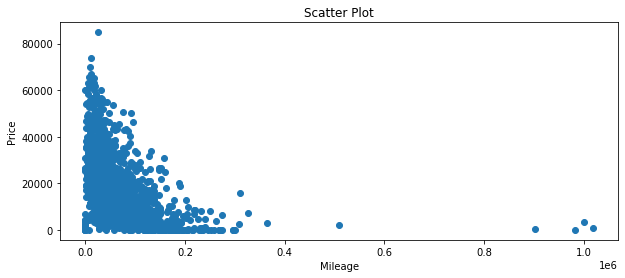

In [47]:
fig, ax = plt.subplots(figsize = (10,4))

ax.scatter( df['mileage'], df['price'])

ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
ax.set_title('Scatter Plot')


plt.show()

Scatter plot of data with outliners removed

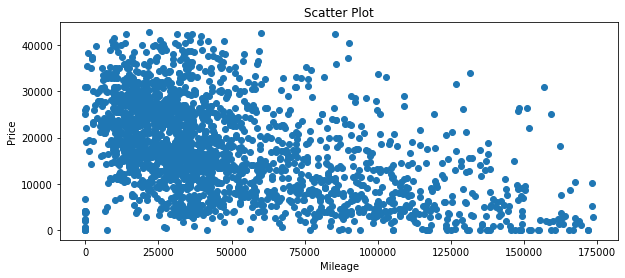

In [48]:
fig, ax = plt.subplots(figsize = (10,4))

ax.scatter( df2['mileage'], df2['price'])

ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
ax.set_title('Scatter Plot')


plt.show()

#### Re-estimate Model

In [56]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split   # <- look at this import


model = LinearRegression()

# getting the dependent and independent variables
x_data = df2[['mileage']]
y_data = df2['price']



# split data: training 70% , test 30% with shuffle
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = 0.7)


# fit the model -> build the training model
model.fit(x_train, y_train)

#-----------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)
print()

#-------------------------------
# Printing coefficient and intercept

print(f"Intercept: {model.intercept_} \t Beta_1 Coef: {model.coef_}")


The r2 is:  0.23771171956512183
The rmse is:  8517.727429962682

Intercept: 23179.801402131332 	 Beta_1 Coef: [-0.12301884]


#### Prediction

In [66]:
def price_estimator(mileage_data, intercept, coef ):
    for mileage in mileage_data:
        price = intercept + coef * mileage
        print(f"Mileage: {mileage} \t\t predicted price: {price}")
        
    print()

In [68]:
interested_mileage = [10000, 25000, 50000]

price_estimator(interested_mileage, model.intercept_,  model.coef_)

Mileage: 10000 		 predicted price: [21949.61303742]
Mileage: 25000 		 predicted price: [20104.33049034]
Mileage: 50000 		 predicted price: [17028.85957856]



#### Multi-Variable Model

><img src="Images/LinearRegression1.png"  />

In [70]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split   # <- look at this import


model = LinearRegression()

#deep copy of dataframe
df2 = df.copy(deep=True)  # deep : bool, default True


# remove outlines 
df2 = remove_outliers(df2,columns, 2)
print("\n\n")

df2.info()



# getting the dependent and independent variables
x_data = df2[['mileage', 'year']]
y_data = df2['price']



# split data: training 70% , test 30% with shuffle
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = 0.7)


# fit the model -> build the training model
model.fit(x_train, y_train)

#-----------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)
print()

#-------------------------------
# Printing coefficient and intercept

print(f"Intercept: {model.intercept_} \t Beta's Coef: {model.coef_}")

Working on column: price
Working on column: mileage



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307 entries, 2 to 2498
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         2307 non-null   int64 
 1   brand         2307 non-null   object
 2   model         2307 non-null   object
 3   year          2307 non-null   int64 
 4   title_status  2307 non-null   object
 5   mileage       2307 non-null   int64 
 6   color         2307 non-null   object
 7   vin           2307 non-null   object
 8   lot           2307 non-null   int64 
 9   state         2307 non-null   object
 10  condition     2307 non-null   object
dtypes: int64(4), object(7)
memory usage: 216.3+ KB
The r2 is:  0.27224522279426155
The rmse is:  8137.321008518533

Intercept: -1051206.8449320772 	 Beta's Coef: [-9.67815795e-02  5.32143264e+02]


In [73]:
def price_estimator2(mileage_data, intercept, coefs ):
    for entry in mileage_data:
        price = intercept + coefs[0] * entry[0] + coefs[1] * entry[1]
        print(f"Year: {entry[1]} \t\t Mileage: {entry[0]} \t\t predicted price: {price}")
        
    print()



interested_mileage = [[10000,2018] ,[25000,2018]]

price_estimator2(interested_mileage, model.intercept_,  model.coef_)

Year: 2018 		 Mileage: 10000 		 predicted price: 21690.446662246715
Year: 2018 		 Mileage: 25000 		 predicted price: 20238.722970379982

